make some images for YOLO v3

add 64*64 light echo images to gaussian background at random scales and positions

In [1]:
import numpy as np
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

import cv2
import skimage as sk
from skimage import io
from skimage import transform


In [147]:
from matplotlib.patches import Rectangle


In [5]:
import glob

In [75]:
IMGSIZE = 416

In [76]:
IMG = np.random.randint(0, 256, size=(IMGSIZE, IMGSIZE) )

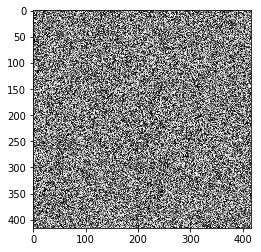

In [77]:
plt.imshow(IMG, cmap='gray')

load star and light echo images

In [12]:
imgfiles_star = glob.glob('./star/*.jpg')
imgfiles_LE = glob.glob('./LEs/*.jpg')

In [13]:
def stack_imgs(imgfiles, imgshape=[64, 64, 3]):
    """stack image as numpy array """
    N_imgs = len(imgfiles)
    imgarr = np.zeros([N_imgs, imgshape[0], imgshape[1], imgshape[2]], dtype=np.uint8)
    for i, imf in enumerate( imgfiles):  
        imgarr[i] = np.asarray( cv2.imread( imf ))
        print('imread ', i, '/', N_imgs,  imf)
    return imgarr


In [18]:
# stack all images as numpy array uint8
imgs_star = stack_imgs(imgfiles_star) 
imgs_LE = stack_imgs(imgfiles_LE)


imread  0 / 1068 ./star/96_59.jpg
imread  1 / 1068 ./star/82_10.jpg
imread  2 / 1068 ./star/37_115.jpg
imread  3 / 1068 ./star/54_66_noised.jpg
imread  4 / 1068 ./star/34_143_noised.jpg
imread  5 / 1068 ./star/25_97_noised.jpg
imread  6 / 1068 ./star/89_10_noised.jpg
imread  7 / 1068 ./star/41_98.jpg
imread  8 / 1068 ./star/34_27_noised.jpg
imread  9 / 1068 ./star/83_139_noised.jpg
imread  10 / 1068 ./star/28_9_noised.jpg
imread  11 / 1068 ./star/92_29.jpg
imread  12 / 1068 ./star/91_2.jpg
imread  13 / 1068 ./star/3_98_noised.jpg
imread  14 / 1068 ./star/86_95_noised.jpg
imread  15 / 1068 ./star/39_39_noised.jpg
imread  16 / 1068 ./star/34_45_noised.jpg
imread  17 / 1068 ./star/70_47.jpg
imread  18 / 1068 ./star/84_134_noised.jpg
imread  19 / 1068 ./star/4_68.jpg
imread  20 / 1068 ./star/4_40.jpg
imread  21 / 1068 ./star/35_138_noised.jpg
imread  22 / 1068 ./star/75_88.jpg
imread  23 / 1068 ./star/31_137_noised.jpg
imread  24 / 1068 ./star/43_135_noised.jpg
imread  25 / 1068 ./star/83_

imread  234 / 1068 ./star/40_23.jpg
imread  235 / 1068 ./star/47_54_noised.jpg
imread  236 / 1068 ./star/9_105_noised.jpg
imread  237 / 1068 ./star/6_133.jpg
imread  238 / 1068 ./star/93_126.jpg
imread  239 / 1068 ./star/64_22.jpg
imread  240 / 1068 ./star/6_69.jpg
imread  241 / 1068 ./star/6_141_noised.jpg
imread  242 / 1068 ./star/93_7_noised.jpg
imread  243 / 1068 ./star/70_104_noised.jpg
imread  244 / 1068 ./star/54_48_noised.jpg
imread  245 / 1068 ./star/35_53.jpg
imread  246 / 1068 ./star/3_81_noised.jpg
imread  247 / 1068 ./star/25_137_noised.jpg
imread  248 / 1068 ./star/57_135_noised.jpg
imread  249 / 1068 ./star/76_122.jpg
imread  250 / 1068 ./star/35_84.jpg
imread  251 / 1068 ./star/27_139.jpg
imread  252 / 1068 ./star/16_89_noised.jpg
imread  253 / 1068 ./star/3_0_noised.jpg
imread  254 / 1068 ./star/90_134_noised.jpg
imread  255 / 1068 ./star/94_94_noised.jpg
imread  256 / 1068 ./star/91_27.jpg
imread  257 / 1068 ./star/60_128.jpg
imread  258 / 1068 ./star/70_103_noised.jp

imread  634 / 1068 ./star/43_139.jpg
imread  635 / 1068 ./star/9_41.jpg
imread  636 / 1068 ./star/78_62.jpg
imread  637 / 1068 ./star/37_13.jpg
imread  638 / 1068 ./star/39_117.jpg
imread  639 / 1068 ./star/76_73.jpg
imread  640 / 1068 ./star/40_32_noised.jpg
imread  641 / 1068 ./star/3_3.jpg
imread  642 / 1068 ./star/10_38_noised.jpg
imread  643 / 1068 ./star/39_116.jpg
imread  644 / 1068 ./star/71_47.jpg
imread  645 / 1068 ./star/24_91.jpg
imread  646 / 1068 ./star/92_8.jpg
imread  647 / 1068 ./star/44_17.jpg
imread  648 / 1068 ./star/73_83_noised.jpg
imread  649 / 1068 ./star/4_106.jpg
imread  650 / 1068 ./star/59_46.jpg
imread  651 / 1068 ./star/34_139_noised.jpg
imread  652 / 1068 ./star/29_5_noised.jpg
imread  653 / 1068 ./star/84_31.jpg
imread  654 / 1068 ./star/40_84_noised.jpg
imread  655 / 1068 ./star/3_35.jpg
imread  656 / 1068 ./star/46_7_noised.jpg
imread  657 / 1068 ./star/91_27_noised.jpg
imread  658 / 1068 ./star/31_73.jpg
imread  659 / 1068 ./star/91_10_noised.jpg
imre

imread  1033 / 1068 ./star/43_84.jpg
imread  1034 / 1068 ./star/71_22.jpg
imread  1035 / 1068 ./star/93_62_noised.jpg
imread  1036 / 1068 ./star/57_115_noised.jpg
imread  1037 / 1068 ./star/93_55_noised.jpg
imread  1038 / 1068 ./star/90_123_noised.jpg
imread  1039 / 1068 ./star/14_103.jpg
imread  1040 / 1068 ./star/9_25.jpg
imread  1041 / 1068 ./star/27_72.jpg
imread  1042 / 1068 ./star/92_61_noised.jpg
imread  1043 / 1068 ./star/4_118_noised.jpg
imread  1044 / 1068 ./star/34_32.jpg
imread  1045 / 1068 ./star/54_109.jpg
imread  1046 / 1068 ./star/47_43_noised.jpg
imread  1047 / 1068 ./star/62_123.jpg
imread  1048 / 1068 ./star/29_77.jpg
imread  1049 / 1068 ./star/83_75.jpg
imread  1050 / 1068 ./star/33_104.jpg
imread  1051 / 1068 ./star/76_75_noised.jpg
imread  1052 / 1068 ./star/99_30_noised.jpg
imread  1053 / 1068 ./star/54_120_noised.jpg
imread  1054 / 1068 ./star/26_115_noised.jpg
imread  1055 / 1068 ./star/6_48.jpg
imread  1056 / 1068 ./star/7_42_noised.jpg
imread  1057 / 1068 ./s

imread  165 / 1070 ./LEs/18_76_flip_h_noised.jpg
imread  166 / 1070 ./LEs/70_77_flip_h.jpg
imread  167 / 1070 ./LEs/136_5_noised.jpg
imread  168 / 1070 ./LEs/20_41_flip_v.jpg
imread  169 / 1070 ./LEs/16_10_rotated90_noised.jpg
imread  170 / 1070 ./LEs/54_37_rotated270.jpg
imread  171 / 1070 ./LEs/19_34_flip_h.jpg
imread  172 / 1070 ./LEs/19_45_flip_v_noised.jpg
imread  173 / 1070 ./LEs/156_49_flip_h_noised.jpg
imread  174 / 1070 ./LEs/88_143.jpg
imread  175 / 1070 ./LEs/40_140_flip_v_noised.jpg
imread  176 / 1070 ./LEs/157_49_flip_h.jpg
imread  177 / 1070 ./LEs/20_41_rotated90.jpg
imread  178 / 1070 ./LEs/46_106_rotated180.jpg
imread  179 / 1070 ./LEs/57_37_flip_v.jpg
imread  180 / 1070 ./LEs/52_36.jpg
imread  181 / 1070 ./LEs/156_73_rotated180.jpg
imread  182 / 1070 ./LEs/54_36_flip_v_noised.jpg
imread  183 / 1070 ./LEs/47_133_rotated90.jpg
imread  184 / 1070 ./LEs/22_41_flip_h.jpg
imread  185 / 1070 ./LEs/139_5_rotated180.jpg
imread  186 / 1070 ./LEs/46_80.jpg
imread  187 / 1070 ./LE

imread  378 / 1070 ./LEs/42_141_noised.jpg
imread  379 / 1070 ./LEs/51_115_flip_v.jpg
imread  380 / 1070 ./LEs/20_35_rotated180.jpg
imread  381 / 1070 ./LEs/15_10_rotated90_noised.jpg
imread  382 / 1070 ./LEs/70_77_rotated270.jpg
imread  383 / 1070 ./LEs/5_10_noised.jpg
imread  384 / 1070 ./LEs/52_37_rotated270.jpg
imread  385 / 1070 ./LEs/22_45_flip_v.jpg
imread  386 / 1070 ./LEs/157_49_noised.jpg
imread  387 / 1070 ./LEs/46_104.jpg
imread  388 / 1070 ./LEs/20_45_rotated180.jpg
imread  389 / 1070 ./LEs/16_10_flip_h_noised.jpg
imread  390 / 1070 ./LEs/40_141.jpg
imread  391 / 1070 ./LEs/20_40_flip_h_noised.jpg
imread  392 / 1070 ./LEs/22_34_flip_h_noised.jpg
imread  393 / 1070 ./LEs/19_55_rotated270.jpg
imread  394 / 1070 ./LEs/19_40_rotated270.jpg
imread  395 / 1070 ./LEs/18_40_flip_v.jpg
imread  396 / 1070 ./LEs/19_34_noised.jpg
imread  397 / 1070 ./LEs/136_5_flip_h.jpg
imread  398 / 1070 ./LEs/70_77_noised.jpg
imread  399 / 1070 ./LEs/6_11_flip_v_noised.jpg
imread  400 / 1070 ./LEs/

imread  593 / 1070 ./LEs/46_80_flip_h.jpg
imread  594 / 1070 ./LEs/6_10.jpg
imread  595 / 1070 ./LEs/158_73.jpg
imread  596 / 1070 ./LEs/157_60_rotated270.jpg
imread  597 / 1070 ./LEs/46_68_flip_v.jpg
imread  598 / 1070 ./LEs/136_27.jpg
imread  599 / 1070 ./LEs/159_73_flip_v_noised.jpg
imread  600 / 1070 ./LEs/139_27_flip_v_noised.jpg
imread  601 / 1070 ./LEs/47_80_rotated180.jpg
imread  602 / 1070 ./LEs/15_10_flip_v_noised.jpg
imread  603 / 1070 ./LEs/157_86_flip_v.jpg
imread  604 / 1070 ./LEs/146_14_noised.jpg
imread  605 / 1070 ./LEs/45_141_rotated180.jpg
imread  606 / 1070 ./LEs/140_27_flip_v_noised.jpg
imread  607 / 1070 ./LEs/69_108_flip_v_noised.jpg
imread  608 / 1070 ./LEs/85_143_rotated180.jpg
imread  609 / 1070 ./LEs/53_36_flip_v_noised.jpg
imread  610 / 1070 ./LEs/22_40_flip_h.jpg
imread  611 / 1070 ./LEs/47_90.jpg
imread  612 / 1070 ./LEs/48_115_rotated270.jpg
imread  613 / 1070 ./LEs/20_41_rotated270.jpg
imread  614 / 1070 ./LEs/51_115_flip_h_noised.jpg
imread  615 / 1070 

imread  798 / 1070 ./LEs/14_10_flip_v_noised.jpg
imread  799 / 1070 ./LEs/45_141_flip_v.jpg
imread  800 / 1070 ./LEs/20_34_flip_v_noised.jpg
imread  801 / 1070 ./LEs/70_77_flip_v_noised.jpg
imread  802 / 1070 ./LEs/22_40_flip_v_noised.jpg
imread  803 / 1070 ./LEs/48_133_flip_v_noised.jpg
imread  804 / 1070 ./LEs/18_23_flip_v.jpg
imread  805 / 1070 ./LEs/46_68_rotated180.jpg
imread  806 / 1070 ./LEs/158_73_flip_v_noised.jpg
imread  807 / 1070 ./LEs/18_76_rotated270.jpg
imread  808 / 1070 ./LEs/87_143_noised.jpg
imread  809 / 1070 ./LEs/45_141_flip_h_noised.jpg
imread  810 / 1070 ./LEs/46_116_flip_v.jpg
imread  811 / 1070 ./LEs/46_68_rotated90.jpg
imread  812 / 1070 ./LEs/157_86_rotated270.jpg
imread  813 / 1070 ./LEs/19_55_flip_v_noised.jpg
imread  814 / 1070 ./LEs/57_36_flip_h_noised.jpg
imread  815 / 1070 ./LEs/157_49_rotated180.jpg
imread  816 / 1070 ./LEs/28_89_flip_h_noised.jpg
imread  817 / 1070 ./LEs/20_55_flip_h.jpg
imread  818 / 1070 ./LEs/47_106_rotated180.jpg
imread  819 / 10

In [21]:
X_star_LE = np.concatenate( (imgs_star, imgs_LE),  axis=0 ) [:,:,:,0] # select the first channel only
X_star_LE.shape

(2138, 64, 64)

In [29]:
y_star = np.zeros( (imgs_star.shape[0], 1) ) 
y_LE = np.ones( (imgs_LE.shape[0], 1) ) 
Y_star_LE = np.concatenate( (y_star, y_LE),  axis=0 )
Y_star_LE.shape

(2138, 1)

In [155]:
np.random.randint(1, 5)


2

In [169]:
64*.2

12.8

In [175]:
pwd

'/Users/home/Documents/Research/lightEchos/imgs/star_64'

In [243]:
def make_image(num=10, dataset='train'):
    for img_num in range(num):
        
        imagepath = "/Users/home/Documents/Research/lightEchos/imgs/star_64/yolo416/{}/{:06d}.jpg".format(dataset, img_num+1)
        annotation = imagepath 
        #IMG = np.random.randint(0, 256, size=(IMGSIZE, IMGSIZE) )
        IMG = np.random.randint(0, 256, size=(IMGSIZE, IMGSIZE) ).astype('f')
    
        # add patches
        npatch = np.random.randint(1, 5)
        bndbox = []
        for i in range(npatch):
            # select a random image from X
            idx = np.random.randint(0, X_star_LE.shape[0])
            signal = X_star_LE[idx, :]
            classid = Y_star_LE[idx]
            # random scale
            ratio = np.random.uniform(0.2, 3)
    
            # create signal ready to added to image
            patch = sk.transform.rescale(signal, scale=ratio, mode='constant')*255
            patchsize = patch.shape[0]
            # add patch to IMG
            # random select xmin, ymin, 
    
            xmin = np.random.randint(0, IMGSIZE-patchsize)
            ymin = np.random.randint(0, IMGSIZE-patchsize)
            xmax = xmin+patchsize
            ymax = ymin+patchsize
            snr = 100
            IMG[xmin:xmax, ymin:ymax] = IMG[xmin:xmax, ymin:ymax]*(1/snr) + patch * (1-1/snr)
            print('img {}, Add patch: class={}, shape={}, pos=({}, {})'.format(img_num+1, classid, patch.shape, xmin, ymin) )
            bndbox.append( (xmin, ymin, xmax, ymax, classid[0] ) )
    
            annotation += ' ' + ','.join([str(xmin), str(ymin), str(xmax), str(ymax), str( int(classid[0]))])
        
        cv2.imwrite(imagepath, IMG.T)
        with open('./yolo416/label_{}.txt'.format(dataset), 'a') as wf:
            wf.write(annotation+'\n')
        



In [251]:
make_image(1000, dataset='train')

img 1, Add patch: class=[1.], shape=(107, 107), pos=(301, 71)
img 2, Add patch: class=[0.], shape=(49, 49), pos=(73, 97)
img 2, Add patch: class=[1.], shape=(24, 24), pos=(24, 192)
img 3, Add patch: class=[1.], shape=(132, 132), pos=(122, 248)
img 4, Add patch: class=[0.], shape=(150, 150), pos=(145, 245)
img 4, Add patch: class=[0.], shape=(146, 146), pos=(190, 190)
img 5, Add patch: class=[1.], shape=(38, 38), pos=(303, 148)
img 6, Add patch: class=[0.], shape=(177, 177), pos=(68, 134)
img 6, Add patch: class=[0.], shape=(104, 104), pos=(284, 78)
img 6, Add patch: class=[0.], shape=(167, 167), pos=(54, 61)
img 7, Add patch: class=[0.], shape=(124, 124), pos=(218, 160)
img 7, Add patch: class=[1.], shape=(44, 44), pos=(243, 94)
img 8, Add patch: class=[1.], shape=(165, 165), pos=(200, 158)
img 8, Add patch: class=[1.], shape=(97, 97), pos=(282, 27)
img 8, Add patch: class=[0.], shape=(28, 28), pos=(292, 372)
img 9, Add patch: class=[1.], shape=(169, 169), pos=(32, 60)
img 9, Add patch

img 58, Add patch: class=[0.], shape=(160, 160), pos=(107, 96)
img 59, Add patch: class=[1.], shape=(19, 19), pos=(245, 137)
img 59, Add patch: class=[1.], shape=(127, 127), pos=(11, 234)
img 59, Add patch: class=[1.], shape=(89, 89), pos=(312, 83)
img 59, Add patch: class=[0.], shape=(30, 30), pos=(322, 62)
img 60, Add patch: class=[0.], shape=(134, 134), pos=(234, 88)
img 61, Add patch: class=[0.], shape=(28, 28), pos=(218, 103)
img 61, Add patch: class=[1.], shape=(31, 31), pos=(197, 122)
img 61, Add patch: class=[1.], shape=(81, 81), pos=(48, 316)
img 61, Add patch: class=[1.], shape=(156, 156), pos=(219, 200)
img 62, Add patch: class=[0.], shape=(94, 94), pos=(8, 318)
img 62, Add patch: class=[1.], shape=(76, 76), pos=(102, 154)
img 62, Add patch: class=[1.], shape=(56, 56), pos=(124, 75)
img 63, Add patch: class=[0.], shape=(27, 27), pos=(86, 58)
img 63, Add patch: class=[1.], shape=(96, 96), pos=(61, 72)
img 63, Add patch: class=[1.], shape=(173, 173), pos=(49, 146)
img 64, Add 

img 114, Add patch: class=[0.], shape=(130, 130), pos=(220, 29)
img 114, Add patch: class=[0.], shape=(191, 191), pos=(130, 215)
img 115, Add patch: class=[0.], shape=(71, 71), pos=(213, 17)
img 115, Add patch: class=[0.], shape=(172, 172), pos=(56, 131)
img 116, Add patch: class=[0.], shape=(100, 100), pos=(126, 134)
img 116, Add patch: class=[0.], shape=(44, 44), pos=(148, 161)
img 116, Add patch: class=[1.], shape=(146, 146), pos=(118, 247)
img 116, Add patch: class=[0.], shape=(161, 161), pos=(194, 81)
img 117, Add patch: class=[1.], shape=(89, 89), pos=(173, 22)
img 117, Add patch: class=[0.], shape=(124, 124), pos=(103, 217)
img 117, Add patch: class=[1.], shape=(22, 22), pos=(74, 57)
img 117, Add patch: class=[0.], shape=(123, 123), pos=(64, 239)
img 118, Add patch: class=[1.], shape=(63, 63), pos=(236, 187)
img 118, Add patch: class=[1.], shape=(32, 32), pos=(168, 78)
img 118, Add patch: class=[1.], shape=(53, 53), pos=(288, 0)
img 119, Add patch: class=[0.], shape=(21, 21), po

img 169, Add patch: class=[0.], shape=(113, 113), pos=(196, 95)
img 169, Add patch: class=[1.], shape=(183, 183), pos=(199, 28)
img 169, Add patch: class=[0.], shape=(54, 54), pos=(255, 46)
img 169, Add patch: class=[1.], shape=(77, 77), pos=(35, 254)
img 170, Add patch: class=[1.], shape=(133, 133), pos=(149, 264)
img 170, Add patch: class=[1.], shape=(119, 119), pos=(117, 106)
img 171, Add patch: class=[0.], shape=(34, 34), pos=(229, 37)
img 171, Add patch: class=[0.], shape=(49, 49), pos=(112, 20)
img 171, Add patch: class=[1.], shape=(175, 175), pos=(120, 99)
img 172, Add patch: class=[0.], shape=(172, 172), pos=(62, 204)
img 172, Add patch: class=[0.], shape=(60, 60), pos=(98, 94)
img 173, Add patch: class=[1.], shape=(137, 137), pos=(41, 183)
img 174, Add patch: class=[1.], shape=(174, 174), pos=(38, 87)
img 174, Add patch: class=[0.], shape=(141, 141), pos=(154, 169)
img 174, Add patch: class=[1.], shape=(132, 132), pos=(190, 74)
img 174, Add patch: class=[1.], shape=(124, 124),

img 226, Add patch: class=[0.], shape=(79, 79), pos=(176, 62)
img 226, Add patch: class=[1.], shape=(36, 36), pos=(318, 261)
img 226, Add patch: class=[0.], shape=(141, 141), pos=(104, 200)
img 227, Add patch: class=[0.], shape=(24, 24), pos=(235, 306)
img 227, Add patch: class=[1.], shape=(63, 63), pos=(352, 284)
img 227, Add patch: class=[1.], shape=(141, 141), pos=(73, 191)
img 227, Add patch: class=[0.], shape=(94, 94), pos=(270, 244)
img 228, Add patch: class=[1.], shape=(24, 24), pos=(258, 103)
img 228, Add patch: class=[0.], shape=(132, 132), pos=(114, 52)
img 229, Add patch: class=[1.], shape=(153, 153), pos=(115, 154)
img 229, Add patch: class=[1.], shape=(60, 60), pos=(248, 15)
img 230, Add patch: class=[1.], shape=(105, 105), pos=(80, 172)
img 230, Add patch: class=[0.], shape=(111, 111), pos=(234, 60)
img 231, Add patch: class=[1.], shape=(121, 121), pos=(191, 139)
img 231, Add patch: class=[0.], shape=(119, 119), pos=(189, 161)
img 231, Add patch: class=[1.], shape=(154, 1

img 287, Add patch: class=[0.], shape=(165, 165), pos=(223, 126)
img 287, Add patch: class=[1.], shape=(109, 109), pos=(253, 4)
img 288, Add patch: class=[0.], shape=(103, 103), pos=(72, 112)
img 288, Add patch: class=[0.], shape=(57, 57), pos=(253, 173)
img 288, Add patch: class=[0.], shape=(75, 75), pos=(231, 340)
img 289, Add patch: class=[1.], shape=(106, 106), pos=(276, 217)
img 289, Add patch: class=[0.], shape=(25, 25), pos=(272, 289)
img 289, Add patch: class=[1.], shape=(161, 161), pos=(103, 225)
img 289, Add patch: class=[1.], shape=(159, 159), pos=(195, 51)
img 290, Add patch: class=[0.], shape=(39, 39), pos=(156, 175)
img 290, Add patch: class=[0.], shape=(72, 72), pos=(1, 317)
img 290, Add patch: class=[1.], shape=(22, 22), pos=(28, 288)
img 291, Add patch: class=[1.], shape=(46, 46), pos=(207, 133)
img 291, Add patch: class=[1.], shape=(84, 84), pos=(178, 157)
img 292, Add patch: class=[1.], shape=(140, 140), pos=(165, 207)
img 292, Add patch: class=[1.], shape=(67, 67), 

img 337, Add patch: class=[1.], shape=(29, 29), pos=(61, 236)
img 337, Add patch: class=[0.], shape=(34, 34), pos=(134, 23)
img 337, Add patch: class=[1.], shape=(30, 30), pos=(163, 342)
img 337, Add patch: class=[0.], shape=(85, 85), pos=(299, 224)
img 338, Add patch: class=[1.], shape=(175, 175), pos=(190, 40)
img 338, Add patch: class=[1.], shape=(170, 170), pos=(71, 14)
img 339, Add patch: class=[0.], shape=(152, 152), pos=(210, 72)
img 340, Add patch: class=[0.], shape=(144, 144), pos=(241, 67)
img 340, Add patch: class=[1.], shape=(60, 60), pos=(329, 221)
img 340, Add patch: class=[0.], shape=(55, 55), pos=(340, 3)
img 341, Add patch: class=[0.], shape=(21, 21), pos=(345, 60)
img 341, Add patch: class=[1.], shape=(75, 75), pos=(121, 149)
img 341, Add patch: class=[0.], shape=(85, 85), pos=(230, 65)
img 342, Add patch: class=[1.], shape=(121, 121), pos=(59, 177)
img 342, Add patch: class=[0.], shape=(56, 56), pos=(296, 253)
img 343, Add patch: class=[0.], shape=(156, 156), pos=(88

img 388, Add patch: class=[0.], shape=(92, 92), pos=(5, 201)
img 388, Add patch: class=[1.], shape=(183, 183), pos=(52, 106)
img 389, Add patch: class=[1.], shape=(172, 172), pos=(182, 123)
img 389, Add patch: class=[1.], shape=(142, 142), pos=(84, 209)
img 389, Add patch: class=[1.], shape=(79, 79), pos=(319, 79)
img 389, Add patch: class=[0.], shape=(124, 124), pos=(270, 145)
img 390, Add patch: class=[0.], shape=(105, 105), pos=(162, 222)
img 390, Add patch: class=[1.], shape=(17, 17), pos=(397, 75)
img 390, Add patch: class=[0.], shape=(29, 29), pos=(77, 45)
img 391, Add patch: class=[1.], shape=(148, 148), pos=(46, 78)
img 391, Add patch: class=[0.], shape=(130, 130), pos=(232, 168)
img 392, Add patch: class=[1.], shape=(73, 73), pos=(260, 82)
img 392, Add patch: class=[1.], shape=(51, 51), pos=(288, 128)
img 393, Add patch: class=[1.], shape=(95, 95), pos=(242, 160)
img 393, Add patch: class=[1.], shape=(190, 190), pos=(158, 38)
img 393, Add patch: class=[1.], shape=(104, 104), p

img 447, Add patch: class=[1.], shape=(164, 164), pos=(222, 17)
img 447, Add patch: class=[1.], shape=(124, 124), pos=(133, 174)
img 447, Add patch: class=[0.], shape=(149, 149), pos=(63, 205)
img 448, Add patch: class=[1.], shape=(159, 159), pos=(30, 47)
img 448, Add patch: class=[0.], shape=(57, 57), pos=(136, 265)
img 448, Add patch: class=[1.], shape=(84, 84), pos=(163, 278)
img 448, Add patch: class=[1.], shape=(17, 17), pos=(350, 273)
img 449, Add patch: class=[0.], shape=(146, 146), pos=(141, 93)
img 449, Add patch: class=[0.], shape=(70, 70), pos=(238, 5)
img 450, Add patch: class=[0.], shape=(64, 64), pos=(31, 308)
img 450, Add patch: class=[0.], shape=(60, 60), pos=(192, 257)
img 450, Add patch: class=[1.], shape=(158, 158), pos=(144, 154)
img 450, Add patch: class=[1.], shape=(17, 17), pos=(211, 302)
img 451, Add patch: class=[1.], shape=(77, 77), pos=(120, 213)
img 452, Add patch: class=[1.], shape=(70, 70), pos=(167, 307)
img 452, Add patch: class=[1.], shape=(152, 152), p

img 508, Add patch: class=[1.], shape=(138, 138), pos=(28, 135)
img 508, Add patch: class=[1.], shape=(93, 93), pos=(251, 215)
img 509, Add patch: class=[0.], shape=(159, 159), pos=(15, 127)
img 509, Add patch: class=[1.], shape=(130, 130), pos=(277, 116)
img 509, Add patch: class=[1.], shape=(76, 76), pos=(156, 126)
img 509, Add patch: class=[1.], shape=(183, 183), pos=(134, 46)
img 510, Add patch: class=[0.], shape=(113, 113), pos=(89, 70)
img 510, Add patch: class=[0.], shape=(160, 160), pos=(158, 95)
img 510, Add patch: class=[0.], shape=(48, 48), pos=(74, 33)
img 510, Add patch: class=[1.], shape=(124, 124), pos=(238, 179)
img 511, Add patch: class=[0.], shape=(171, 171), pos=(55, 228)
img 511, Add patch: class=[1.], shape=(82, 82), pos=(210, 255)
img 512, Add patch: class=[1.], shape=(18, 18), pos=(50, 148)
img 513, Add patch: class=[1.], shape=(30, 30), pos=(232, 182)
img 513, Add patch: class=[0.], shape=(107, 107), pos=(191, 238)
img 513, Add patch: class=[0.], shape=(22, 22),

img 568, Add patch: class=[0.], shape=(100, 100), pos=(288, 186)
img 569, Add patch: class=[0.], shape=(88, 88), pos=(95, 308)
img 569, Add patch: class=[0.], shape=(101, 101), pos=(43, 47)
img 569, Add patch: class=[0.], shape=(104, 104), pos=(203, 83)
img 569, Add patch: class=[1.], shape=(125, 125), pos=(130, 138)
img 570, Add patch: class=[0.], shape=(36, 36), pos=(29, 170)
img 571, Add patch: class=[0.], shape=(152, 152), pos=(108, 115)
img 571, Add patch: class=[1.], shape=(87, 87), pos=(96, 17)
img 571, Add patch: class=[0.], shape=(97, 97), pos=(263, 261)
img 572, Add patch: class=[0.], shape=(46, 46), pos=(280, 37)
img 573, Add patch: class=[0.], shape=(47, 47), pos=(336, 166)
img 573, Add patch: class=[0.], shape=(46, 46), pos=(111, 77)
img 573, Add patch: class=[1.], shape=(59, 59), pos=(270, 129)
img 574, Add patch: class=[1.], shape=(13, 13), pos=(15, 192)
img 574, Add patch: class=[1.], shape=(165, 165), pos=(3, 142)
img 574, Add patch: class=[0.], shape=(181, 181), pos=(

img 627, Add patch: class=[0.], shape=(85, 85), pos=(136, 202)
img 628, Add patch: class=[1.], shape=(117, 117), pos=(3, 174)
img 628, Add patch: class=[1.], shape=(40, 40), pos=(302, 238)
img 628, Add patch: class=[0.], shape=(103, 103), pos=(239, 241)
img 629, Add patch: class=[0.], shape=(51, 51), pos=(175, 161)
img 630, Add patch: class=[0.], shape=(91, 91), pos=(51, 281)
img 630, Add patch: class=[1.], shape=(46, 46), pos=(105, 182)
img 630, Add patch: class=[0.], shape=(106, 106), pos=(55, 23)
img 631, Add patch: class=[0.], shape=(134, 134), pos=(71, 174)
img 631, Add patch: class=[1.], shape=(73, 73), pos=(293, 123)
img 631, Add patch: class=[1.], shape=(148, 148), pos=(162, 69)
img 631, Add patch: class=[1.], shape=(82, 82), pos=(36, 185)
img 632, Add patch: class=[0.], shape=(125, 125), pos=(213, 151)
img 632, Add patch: class=[1.], shape=(37, 37), pos=(277, 49)
img 632, Add patch: class=[0.], shape=(22, 22), pos=(291, 129)
img 632, Add patch: class=[1.], shape=(132, 132), po

img 688, Add patch: class=[0.], shape=(130, 130), pos=(59, 89)
img 688, Add patch: class=[0.], shape=(137, 137), pos=(252, 139)
img 689, Add patch: class=[1.], shape=(55, 55), pos=(226, 170)
img 690, Add patch: class=[1.], shape=(45, 45), pos=(71, 308)
img 691, Add patch: class=[1.], shape=(13, 13), pos=(399, 398)
img 691, Add patch: class=[1.], shape=(182, 182), pos=(144, 34)
img 692, Add patch: class=[1.], shape=(78, 78), pos=(94, 109)
img 692, Add patch: class=[1.], shape=(135, 135), pos=(219, 64)
img 692, Add patch: class=[1.], shape=(99, 99), pos=(51, 301)
img 692, Add patch: class=[1.], shape=(92, 92), pos=(180, 20)
img 693, Add patch: class=[0.], shape=(136, 136), pos=(21, 125)
img 693, Add patch: class=[1.], shape=(56, 56), pos=(74, 326)
img 693, Add patch: class=[0.], shape=(140, 140), pos=(103, 249)
img 693, Add patch: class=[1.], shape=(178, 178), pos=(202, 48)
img 694, Add patch: class=[0.], shape=(52, 52), pos=(305, 30)
img 694, Add patch: class=[1.], shape=(165, 165), pos

img 746, Add patch: class=[0.], shape=(123, 123), pos=(238, 89)
img 746, Add patch: class=[0.], shape=(125, 125), pos=(157, 175)
img 747, Add patch: class=[0.], shape=(148, 148), pos=(126, 114)
img 747, Add patch: class=[1.], shape=(190, 190), pos=(107, 132)
img 747, Add patch: class=[1.], shape=(174, 174), pos=(112, 32)
img 747, Add patch: class=[1.], shape=(142, 142), pos=(23, 40)
img 748, Add patch: class=[0.], shape=(34, 34), pos=(98, 363)
img 749, Add patch: class=[0.], shape=(84, 84), pos=(108, 139)
img 749, Add patch: class=[1.], shape=(154, 154), pos=(94, 26)
img 749, Add patch: class=[1.], shape=(29, 29), pos=(149, 80)
img 749, Add patch: class=[0.], shape=(39, 39), pos=(275, 349)
img 750, Add patch: class=[0.], shape=(165, 165), pos=(180, 249)
img 750, Add patch: class=[0.], shape=(151, 151), pos=(20, 34)
img 751, Add patch: class=[0.], shape=(123, 123), pos=(112, 73)
img 751, Add patch: class=[0.], shape=(180, 180), pos=(232, 219)
img 752, Add patch: class=[0.], shape=(39, 3

img 807, Add patch: class=[0.], shape=(174, 174), pos=(210, 12)
img 807, Add patch: class=[1.], shape=(99, 99), pos=(36, 194)
img 807, Add patch: class=[0.], shape=(177, 177), pos=(108, 12)
img 808, Add patch: class=[0.], shape=(168, 168), pos=(144, 225)
img 808, Add patch: class=[0.], shape=(20, 20), pos=(342, 192)
img 809, Add patch: class=[1.], shape=(93, 93), pos=(208, 286)
img 810, Add patch: class=[0.], shape=(79, 79), pos=(145, 38)
img 810, Add patch: class=[0.], shape=(100, 100), pos=(40, 285)
img 811, Add patch: class=[0.], shape=(20, 20), pos=(350, 366)
img 811, Add patch: class=[1.], shape=(87, 87), pos=(145, 26)
img 811, Add patch: class=[0.], shape=(45, 45), pos=(285, 235)
img 812, Add patch: class=[1.], shape=(149, 149), pos=(18, 163)
img 812, Add patch: class=[0.], shape=(20, 20), pos=(372, 281)
img 812, Add patch: class=[1.], shape=(136, 136), pos=(63, 139)
img 812, Add patch: class=[1.], shape=(119, 119), pos=(66, 33)
img 813, Add patch: class=[1.], shape=(118, 118), p

img 859, Add patch: class=[1.], shape=(146, 146), pos=(23, 79)
img 859, Add patch: class=[1.], shape=(170, 170), pos=(222, 207)
img 859, Add patch: class=[0.], shape=(30, 30), pos=(133, 4)
img 860, Add patch: class=[1.], shape=(24, 24), pos=(164, 365)
img 860, Add patch: class=[0.], shape=(81, 81), pos=(301, 175)
img 861, Add patch: class=[0.], shape=(103, 103), pos=(57, 273)
img 861, Add patch: class=[0.], shape=(87, 87), pos=(230, 75)
img 862, Add patch: class=[0.], shape=(184, 184), pos=(181, 134)
img 862, Add patch: class=[0.], shape=(111, 111), pos=(213, 135)
img 862, Add patch: class=[1.], shape=(187, 187), pos=(212, 100)
img 862, Add patch: class=[1.], shape=(58, 58), pos=(24, 309)
img 863, Add patch: class=[1.], shape=(69, 69), pos=(218, 146)
img 863, Add patch: class=[1.], shape=(162, 162), pos=(170, 149)
img 864, Add patch: class=[0.], shape=(178, 178), pos=(94, 215)
img 864, Add patch: class=[1.], shape=(44, 44), pos=(270, 114)
img 865, Add patch: class=[0.], shape=(162, 162

img 920, Add patch: class=[1.], shape=(34, 34), pos=(299, 206)
img 920, Add patch: class=[0.], shape=(79, 79), pos=(77, 109)
img 921, Add patch: class=[1.], shape=(52, 52), pos=(299, 127)
img 921, Add patch: class=[0.], shape=(122, 122), pos=(226, 221)
img 921, Add patch: class=[0.], shape=(90, 90), pos=(195, 307)
img 921, Add patch: class=[0.], shape=(36, 36), pos=(357, 217)
img 922, Add patch: class=[0.], shape=(72, 72), pos=(251, 175)
img 922, Add patch: class=[1.], shape=(47, 47), pos=(220, 157)
img 922, Add patch: class=[0.], shape=(99, 99), pos=(58, 24)
img 923, Add patch: class=[0.], shape=(33, 33), pos=(345, 192)
img 923, Add patch: class=[1.], shape=(115, 115), pos=(201, 156)
img 924, Add patch: class=[1.], shape=(147, 147), pos=(85, 140)
img 924, Add patch: class=[1.], shape=(107, 107), pos=(49, 143)
img 924, Add patch: class=[1.], shape=(143, 143), pos=(145, 76)
img 925, Add patch: class=[0.], shape=(27, 27), pos=(330, 98)
img 925, Add patch: class=[1.], shape=(102, 102), po

img 971, Add patch: class=[1.], shape=(127, 127), pos=(234, 159)
img 971, Add patch: class=[1.], shape=(92, 92), pos=(323, 276)
img 971, Add patch: class=[1.], shape=(124, 124), pos=(135, 275)
img 971, Add patch: class=[0.], shape=(103, 103), pos=(219, 151)
img 972, Add patch: class=[1.], shape=(48, 48), pos=(204, 333)
img 973, Add patch: class=[1.], shape=(140, 140), pos=(271, 147)
img 974, Add patch: class=[0.], shape=(125, 125), pos=(69, 60)
img 975, Add patch: class=[0.], shape=(164, 164), pos=(32, 208)
img 976, Add patch: class=[0.], shape=(176, 176), pos=(154, 158)
img 976, Add patch: class=[1.], shape=(59, 59), pos=(262, 329)
img 976, Add patch: class=[1.], shape=(143, 143), pos=(69, 34)
img 976, Add patch: class=[1.], shape=(107, 107), pos=(268, 135)
img 977, Add patch: class=[1.], shape=(41, 41), pos=(83, 150)
img 977, Add patch: class=[0.], shape=(30, 30), pos=(115, 20)
img 977, Add patch: class=[0.], shape=(170, 170), pos=(82, 53)
img 978, Add patch: class=[0.], shape=(53, 5

In [255]:
make_image(200, dataset='test')

img 1, Add patch: class=[1.], shape=(117, 117), pos=(193, 8)
img 2, Add patch: class=[0.], shape=(60, 60), pos=(156, 119)
img 3, Add patch: class=[1.], shape=(93, 93), pos=(256, 3)
img 4, Add patch: class=[1.], shape=(133, 133), pos=(219, 267)
img 4, Add patch: class=[1.], shape=(105, 105), pos=(281, 55)
img 5, Add patch: class=[0.], shape=(124, 124), pos=(218, 263)
img 5, Add patch: class=[1.], shape=(97, 97), pos=(13, 194)
img 5, Add patch: class=[0.], shape=(154, 154), pos=(212, 187)
img 5, Add patch: class=[1.], shape=(42, 42), pos=(175, 266)
img 6, Add patch: class=[1.], shape=(131, 131), pos=(163, 266)
img 6, Add patch: class=[0.], shape=(47, 47), pos=(20, 270)
img 6, Add patch: class=[1.], shape=(54, 54), pos=(153, 10)
img 7, Add patch: class=[1.], shape=(55, 55), pos=(66, 68)
img 7, Add patch: class=[1.], shape=(162, 162), pos=(107, 79)
img 7, Add patch: class=[1.], shape=(117, 117), pos=(202, 66)
img 7, Add patch: class=[0.], shape=(153, 153), pos=(241, 33)
img 8, Add patch: c

img 65, Add patch: class=[0.], shape=(72, 72), pos=(83, 73)
img 65, Add patch: class=[1.], shape=(116, 116), pos=(228, 83)
img 65, Add patch: class=[0.], shape=(120, 120), pos=(153, 225)
img 65, Add patch: class=[0.], shape=(113, 113), pos=(195, 109)
img 66, Add patch: class=[1.], shape=(25, 25), pos=(123, 132)
img 67, Add patch: class=[1.], shape=(148, 148), pos=(161, 36)
img 67, Add patch: class=[0.], shape=(97, 97), pos=(199, 33)
img 68, Add patch: class=[0.], shape=(77, 77), pos=(170, 87)
img 68, Add patch: class=[0.], shape=(105, 105), pos=(58, 212)
img 68, Add patch: class=[1.], shape=(22, 22), pos=(92, 199)
img 68, Add patch: class=[1.], shape=(85, 85), pos=(136, 111)
img 69, Add patch: class=[1.], shape=(94, 94), pos=(127, 146)
img 69, Add patch: class=[0.], shape=(27, 27), pos=(358, 154)
img 70, Add patch: class=[1.], shape=(98, 98), pos=(55, 171)
img 70, Add patch: class=[1.], shape=(183, 183), pos=(7, 156)
img 70, Add patch: class=[0.], shape=(175, 175), pos=(36, 135)
img 70

img 120, Add patch: class=[1.], shape=(127, 127), pos=(80, 195)
img 121, Add patch: class=[1.], shape=(160, 160), pos=(142, 243)
img 121, Add patch: class=[0.], shape=(143, 143), pos=(145, 132)
img 121, Add patch: class=[0.], shape=(20, 20), pos=(207, 14)
img 121, Add patch: class=[1.], shape=(57, 57), pos=(136, 252)
img 122, Add patch: class=[1.], shape=(151, 151), pos=(169, 149)
img 122, Add patch: class=[1.], shape=(155, 155), pos=(196, 116)
img 122, Add patch: class=[0.], shape=(69, 69), pos=(246, 249)
img 123, Add patch: class=[1.], shape=(55, 55), pos=(115, 56)
img 124, Add patch: class=[1.], shape=(70, 70), pos=(232, 325)
img 125, Add patch: class=[0.], shape=(154, 154), pos=(45, 93)
img 125, Add patch: class=[1.], shape=(109, 109), pos=(225, 67)
img 126, Add patch: class=[1.], shape=(114, 114), pos=(284, 35)
img 127, Add patch: class=[1.], shape=(141, 141), pos=(109, 172)
img 128, Add patch: class=[0.], shape=(77, 77), pos=(34, 135)
img 128, Add patch: class=[1.], shape=(94, 94

img 190, Add patch: class=[1.], shape=(160, 160), pos=(111, 45)
img 191, Add patch: class=[1.], shape=(49, 49), pos=(59, 110)
img 191, Add patch: class=[0.], shape=(130, 130), pos=(89, 177)
img 191, Add patch: class=[0.], shape=(163, 163), pos=(231, 117)
img 191, Add patch: class=[1.], shape=(179, 179), pos=(59, 113)
img 192, Add patch: class=[0.], shape=(159, 159), pos=(63, 249)
img 192, Add patch: class=[1.], shape=(48, 48), pos=(322, 141)
img 192, Add patch: class=[1.], shape=(146, 146), pos=(143, 97)
img 193, Add patch: class=[1.], shape=(90, 90), pos=(80, 161)
img 193, Add patch: class=[0.], shape=(116, 116), pos=(249, 243)
img 193, Add patch: class=[0.], shape=(166, 166), pos=(218, 216)
img 194, Add patch: class=[1.], shape=(14, 14), pos=(176, 285)
img 194, Add patch: class=[0.], shape=(153, 153), pos=(61, 241)
img 195, Add patch: class=[0.], shape=(26, 26), pos=(34, 17)
img 195, Add patch: class=[1.], shape=(123, 123), pos=(143, 234)
img 195, Add patch: class=[1.], shape=(189, 1

In [254]:
pwd

'/Users/home/Documents/Research/lightEchos/imgs/star_64'

In [253]:
ls

5_10.jpg              make_yolo_imgs.ipynb  star/
LEs/                  nostar/
le_aug.ipynb          origin/


In [256]:
make_image(200, dataset='new')

img 1, Add patch: class=[1.], shape=(75, 75), pos=(180, 256)
img 1, Add patch: class=[1.], shape=(47, 47), pos=(35, 41)
img 1, Add patch: class=[0.], shape=(37, 37), pos=(180, 328)
img 1, Add patch: class=[0.], shape=(169, 169), pos=(176, 184)
img 2, Add patch: class=[0.], shape=(146, 146), pos=(88, 127)
img 2, Add patch: class=[0.], shape=(42, 42), pos=(249, 334)
img 3, Add patch: class=[0.], shape=(88, 88), pos=(128, 232)
img 3, Add patch: class=[0.], shape=(60, 60), pos=(249, 47)
img 3, Add patch: class=[0.], shape=(59, 59), pos=(95, 118)
img 4, Add patch: class=[1.], shape=(46, 46), pos=(352, 177)
img 4, Add patch: class=[0.], shape=(46, 46), pos=(207, 22)
img 5, Add patch: class=[0.], shape=(191, 191), pos=(67, 77)
img 5, Add patch: class=[1.], shape=(128, 128), pos=(77, 136)
img 5, Add patch: class=[0.], shape=(86, 86), pos=(135, 68)
img 6, Add patch: class=[0.], shape=(120, 120), pos=(149, 1)
img 6, Add patch: class=[0.], shape=(39, 39), pos=(76, 11)
img 6, Add patch: class=[0.]

img 57, Add patch: class=[1.], shape=(114, 114), pos=(198, 229)
img 57, Add patch: class=[0.], shape=(170, 170), pos=(142, 114)
img 58, Add patch: class=[1.], shape=(163, 163), pos=(229, 97)
img 58, Add patch: class=[1.], shape=(112, 112), pos=(59, 297)
img 58, Add patch: class=[0.], shape=(147, 147), pos=(49, 239)
img 59, Add patch: class=[0.], shape=(161, 161), pos=(6, 197)
img 59, Add patch: class=[1.], shape=(149, 149), pos=(186, 163)
img 60, Add patch: class=[1.], shape=(148, 148), pos=(206, 81)
img 60, Add patch: class=[1.], shape=(135, 135), pos=(202, 167)
img 60, Add patch: class=[1.], shape=(82, 82), pos=(46, 80)
img 61, Add patch: class=[1.], shape=(21, 21), pos=(323, 42)
img 61, Add patch: class=[0.], shape=(126, 126), pos=(110, 199)
img 61, Add patch: class=[0.], shape=(133, 133), pos=(17, 190)
img 61, Add patch: class=[1.], shape=(134, 134), pos=(77, 175)
img 62, Add patch: class=[1.], shape=(43, 43), pos=(370, 42)
img 62, Add patch: class=[1.], shape=(120, 120), pos=(290,

img 122, Add patch: class=[1.], shape=(125, 125), pos=(155, 45)
img 122, Add patch: class=[1.], shape=(149, 149), pos=(103, 17)
img 122, Add patch: class=[1.], shape=(29, 29), pos=(123, 205)
img 123, Add patch: class=[1.], shape=(183, 183), pos=(125, 198)
img 123, Add patch: class=[0.], shape=(85, 85), pos=(225, 61)
img 123, Add patch: class=[0.], shape=(142, 142), pos=(208, 34)
img 124, Add patch: class=[0.], shape=(68, 68), pos=(101, 202)
img 124, Add patch: class=[1.], shape=(36, 36), pos=(373, 323)
img 124, Add patch: class=[0.], shape=(138, 138), pos=(45, 106)
img 125, Add patch: class=[0.], shape=(158, 158), pos=(127, 205)
img 126, Add patch: class=[1.], shape=(169, 169), pos=(77, 148)
img 126, Add patch: class=[0.], shape=(89, 89), pos=(100, 204)
img 126, Add patch: class=[0.], shape=(116, 116), pos=(175, 184)
img 127, Add patch: class=[1.], shape=(177, 177), pos=(219, 77)
img 127, Add patch: class=[0.], shape=(98, 98), pos=(44, 189)
img 127, Add patch: class=[0.], shape=(153, 1

img 190, Add patch: class=[1.], shape=(149, 149), pos=(163, 140)
img 191, Add patch: class=[0.], shape=(54, 54), pos=(356, 12)
img 191, Add patch: class=[0.], shape=(43, 43), pos=(222, 266)
img 191, Add patch: class=[0.], shape=(164, 164), pos=(165, 180)
img 192, Add patch: class=[1.], shape=(174, 174), pos=(193, 187)
img 193, Add patch: class=[0.], shape=(170, 170), pos=(176, 233)
img 193, Add patch: class=[1.], shape=(156, 156), pos=(232, 141)
img 193, Add patch: class=[1.], shape=(92, 92), pos=(308, 281)
img 194, Add patch: class=[0.], shape=(189, 189), pos=(206, 170)
img 194, Add patch: class=[0.], shape=(65, 65), pos=(91, 34)
img 194, Add patch: class=[1.], shape=(83, 83), pos=(59, 306)
img 195, Add patch: class=[1.], shape=(82, 82), pos=(83, 41)
img 195, Add patch: class=[0.], shape=(145, 145), pos=(244, 250)
img 195, Add patch: class=[0.], shape=(137, 137), pos=(216, 24)
img 195, Add patch: class=[1.], shape=(36, 36), pos=(171, 158)
img 196, Add patch: class=[0.], shape=(21, 21)

In [ ]:
    # show
    plt.matshow(IMG.T, cmap='gray')

    for bx in bndbox:
        xmin, ymin, xmax, ymax, classid = bx
        rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none')
        plt.gca().add_patch(rect)



In [206]:
im = cv2.imread(imagepath)

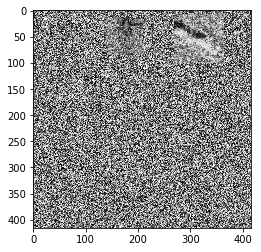

In [207]:
plt.imshow(im[:,:,0].T, cmap='gray')

In [172]:
img_num = 5
"%06d.jpg" %(img_num+1)


'000006.jpg'

In [120]:
Rectangle?

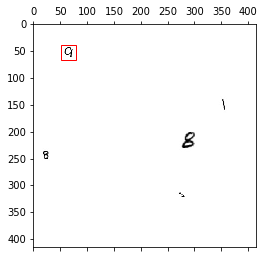

In [235]:
mnist = cv2.imread('./yolo416/000001.jpg')


xmin, ymin, xmax, ymax = 52,39,80,67
    # show
plt.matshow(mnist[:,:,0], cmap='gray')

rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none')
plt.gca().add_patch(rect)


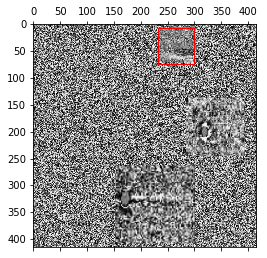

In [250]:
mnist = cv2.imread('./yolo416/train/000008.jpg')


xmin, ymin, xmax, ymax = 233,7,300,74,
    # show
plt.matshow(mnist[:,:,0], cmap='gray')

rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none')
plt.gca().add_patch(rect)